In [1]:
import albumentations as A
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os
from pycocotools.coco import COCO
import seaborn as sns

import sys

sys.path.insert(1, "../..")
from data_processing.data_proc_lib.utilities import BLACK_PIXEL

Set `ROOT` to be the path to the cutouts you want ot examine. The `1` below refers to an individual class. You can change this to be 0-3 (there are 4 galaxy classes).

In [2]:
ROOT = "/mnt/data/rgn_ijcnn/augmented/cutouts_by_class/1"
TRAIN = os.path.join(ROOT, "train")
VAL = os.path.join(ROOT, "val")
TEST = os.path.join(ROOT, "test")
ANNOS = os.path.join(ROOT, "annotations")
TRAIN_ANNOS = os.path.join(ANNOS, "train.json")
VAL_ANNOS = os.path.join(ANNOS, "val.json")
TEST_ANNOS = os.path.join(ANNOS, "test.json")

# Pixel Distribution of Objects

Choose two cutout radio galaxies and find the distribution of non-black pixel values.

In [3]:
coco = COCO(TRAIN_ANNOS)
image_ids = coco.getImgIds()
image_file_names = [coco.loadImgs(image_id)[0]['file_name'] for image_id in image_ids]
imgidx = 1
imfile_1 = image_file_names[imgidx]
#imarr = cv2.imread(os.path.join(TRAIN, imfile))
imarr_1 = np.array(Image.open(os.path.join(TRAIN, imfile_1)))

imgidx = 6
imfile_0 = image_file_names[imgidx]
#imarr = cv2.imread(os.path.join(TRAIN, imfile))
imarr_0 = np.array(Image.open(os.path.join(TRAIN, imfile_0)))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Below is the image we want to transform.

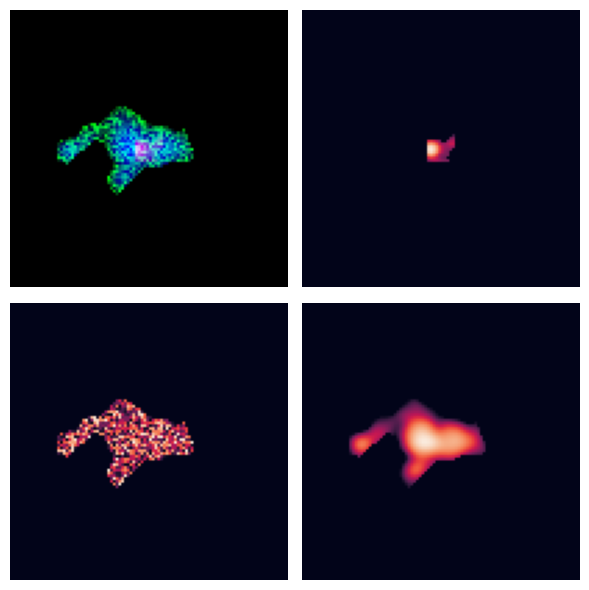

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6))
plt.subplots_adjust(wspace=0, hspace=0)
ax[0, 0].imshow(imarr_1[175:275, 175:275, :])
ax[0, 0].axis("off")
ax[0, 1].imshow(imarr_1[175:275, 175:275, 0])
ax[0, 1].axis("off")
ax[1, 0].imshow(imarr_1[175:275, 175:275, 1])
ax[1, 0].axis("off")
ax[1, 1].imshow(imarr_1[175:275, 175:275, 2])
ax[1, 1].axis("off")
plt.tight_layout()
plt.show()

This is the initial distribution of pixel values.

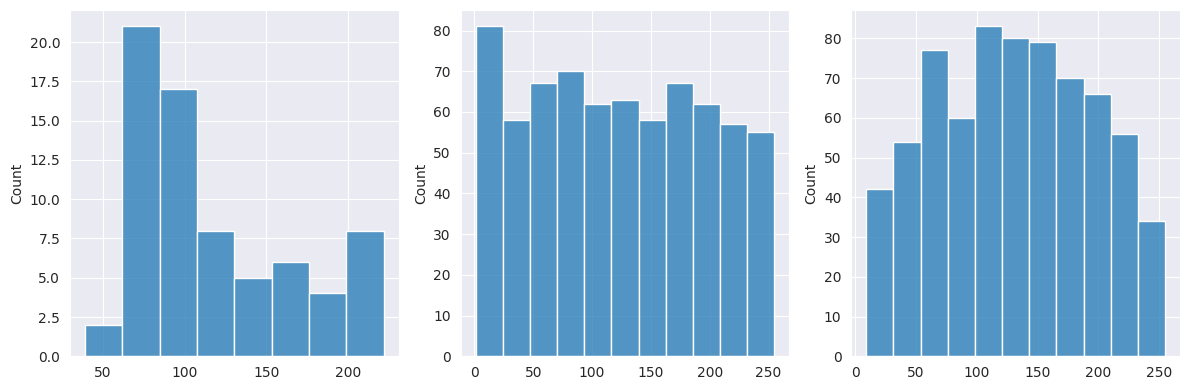

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(imarr_1[:, :, 0][np.where(imarr_1[:, :, 0] != 0)].flatten(), ax=ax[0])
sns.histplot(imarr_1[:, :, 1][np.where(imarr_1[:, :, 1] != 0)].flatten(), ax=ax[1])
sns.histplot(imarr_1[:, :, 2][np.where(imarr_1[:, :, 2] != 0)].flatten(), ax=ax[2])
plt.tight_layout()
plt.show()

Below is the **reference image**.

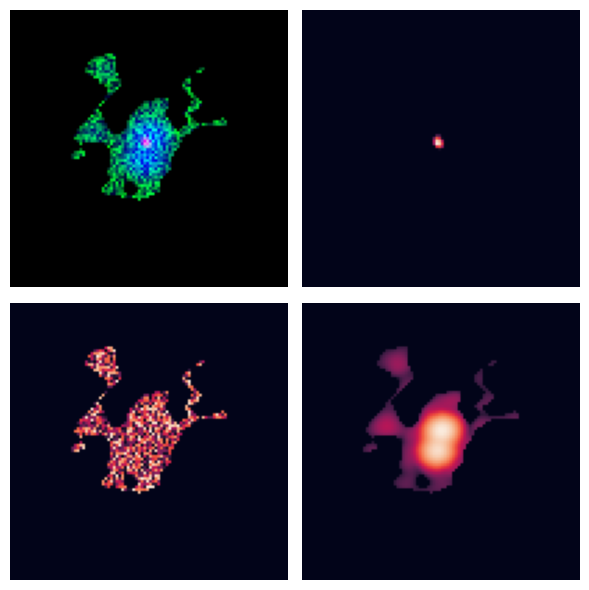

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6))
plt.subplots_adjust(wspace=0, hspace=0)
ax[0, 0].imshow(imarr_0[175:275, 175:275, :])
ax[0, 0].axis("off")
ax[0, 1].imshow(imarr_0[175:275, 175:275, 0])
ax[0, 1].axis("off")
ax[1, 0].imshow(imarr_0[175:275, 175:275, 1])
ax[1, 0].axis("off")
ax[1, 1].imshow(imarr_0[175:275, 175:275, 2])
ax[1, 1].axis("off")
plt.tight_layout()
plt.show()

This is the reference image distribution of pixel values.

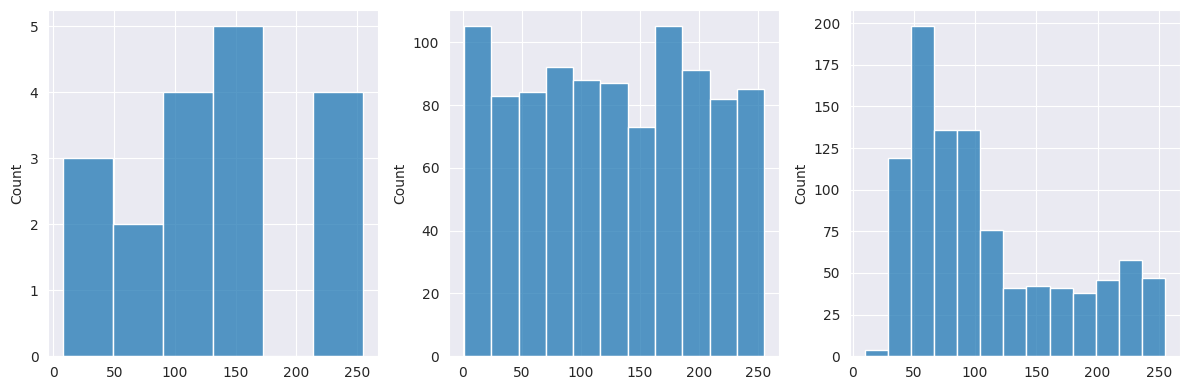

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(imarr_0[:, :, 0][np.where(imarr_0[:, :, 0] != 0)].flatten(), ax=ax[0])
sns.histplot(imarr_0[:, :, 1][np.where(imarr_0[:, :, 1] != 0)].flatten(), ax=ax[1])
sns.histplot(imarr_0[:, :, 2][np.where(imarr_0[:, :, 2] != 0)].flatten(), ax=ax[2])
plt.tight_layout()
plt.show()

## Compare to pixel distributions

The pixel distribution of the reference image.

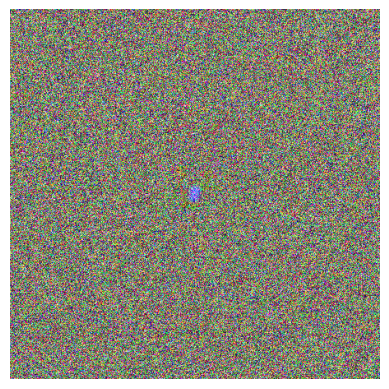

In [8]:
imarr_0_dist = np.array(Image.open(os.path.join(ROOT, "pixel_distributions", imfile_0)))
plt.imshow(imarr_0_dist)
plt.axis("off")
plt.show()

The initial pixel distribution of the image we want to transform.

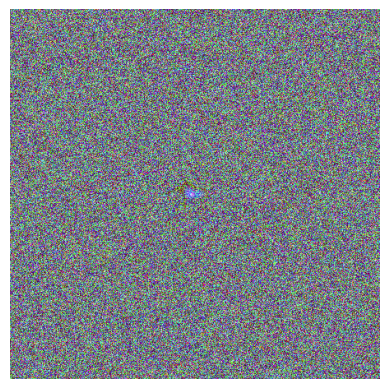

In [9]:
imarr_1_dist = np.array(Image.open(os.path.join(ROOT, "pixel_distributions", imfile_1)))
plt.imshow(imarr_1_dist)
plt.axis("off")
plt.show()

## Transform the Pixel Distributions

We apply a pixel transformation adaptation from the Albumentations library. The reference pixel distribution of one galaxy and the pixel distribution of the galaxy to be transformed are the inputs.

In [10]:
ref_image_path = os.path.join(ROOT, "pixel_distributions", imfile_0)
ref_image_array = np.array(Image.open(ref_image_path))
img_array = np.array(Image.open(os.path.join(ROOT, "pixel_distributions", imfile_1)))
transform = A.FDA([ref_image_path], beta_limit=(0.2, 0.3), p=1)
transformed = transform(image=img_array)
transformed_image = transformed["image"]

# PixelDistributionAdaptation() is a possible alternative to FDA.

The transformed pixel distribution is below.

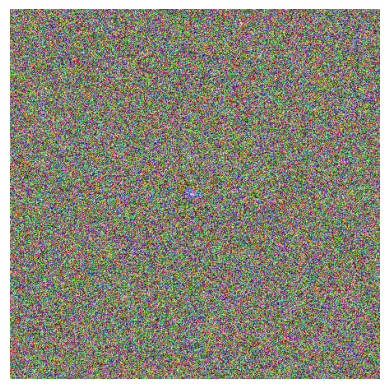

In [11]:
plt.imshow(transformed_image)
plt.axis("off")
plt.show()

Now we recover the black pixels from the original cutout image (before the transform).

In [12]:
for channel in range(imarr_1.shape[2]):
    transformed_image[:, :, channel][np.where(imarr_1[:, :, channel] == BLACK_PIXEL)] = 0

Now we can display the synthetic galaxy cutout we have created.

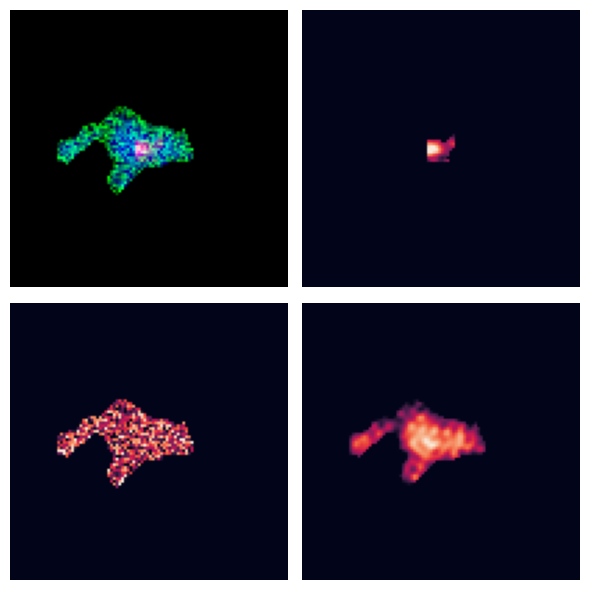

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6))
plt.subplots_adjust(wspace=0, hspace=0)
ax[0, 0].imshow(transformed_image[175:275, 175:275, :])
ax[0, 0].axis("off")
ax[0, 1].imshow(transformed_image[175:275, 175:275, 0])
ax[0, 1].axis("off")
ax[1, 0].imshow(transformed_image[175:275, 175:275, 1])
ax[1, 0].axis("off")
ax[1, 1].imshow(transformed_image[175:275, 175:275, 2])
ax[1, 1].axis("off")
plt.tight_layout()
plt.show()

Here is the new pixel distribution.

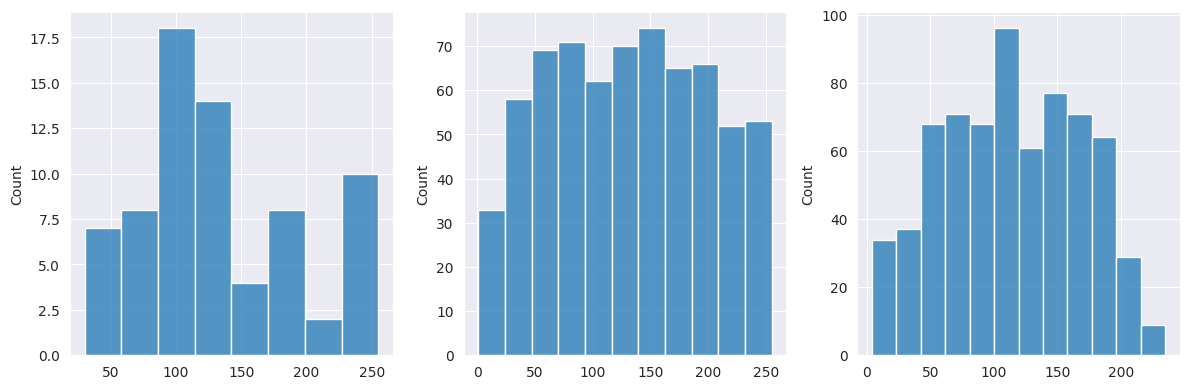

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(transformed_image[:, :, 0][np.where(transformed_image[:, :, 0] != 0)].flatten(), ax=ax[0])
sns.histplot(transformed_image[:, :, 1][np.where(transformed_image[:, :, 1] != 0)].flatten(), ax=ax[1])
sns.histplot(transformed_image[:, :, 2][np.where(transformed_image[:, :, 2] != 0)].flatten(), ax=ax[2])
plt.tight_layout()
plt.show()

The plot below shows the original image, the reference image and the transformed image.

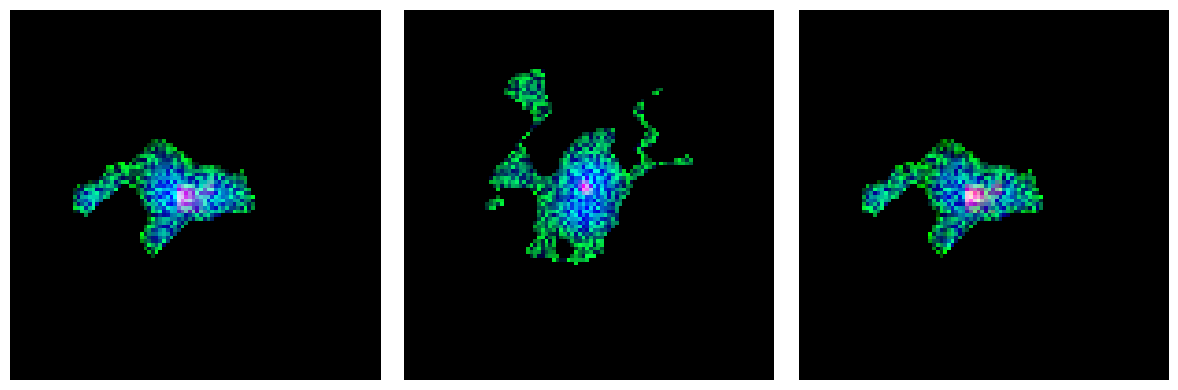

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
plt.subplots_adjust(wspace=0, hspace=0)
ax[0].imshow(imarr_1[175:275, 175:275, :])
ax[0].axis("off")
ax[1].imshow(imarr_0[175:275, 175:275, :])
ax[1].axis("off")
ax[2].imshow(transformed_image[175:275, 175:275, :])
ax[2].axis("off")
plt.tight_layout()
plt.show()

The plot below shows the pixel distribution before (top row) and after (bottom row) in the R channel (leftmost column) and the two radio channels (middle and rightmost column).

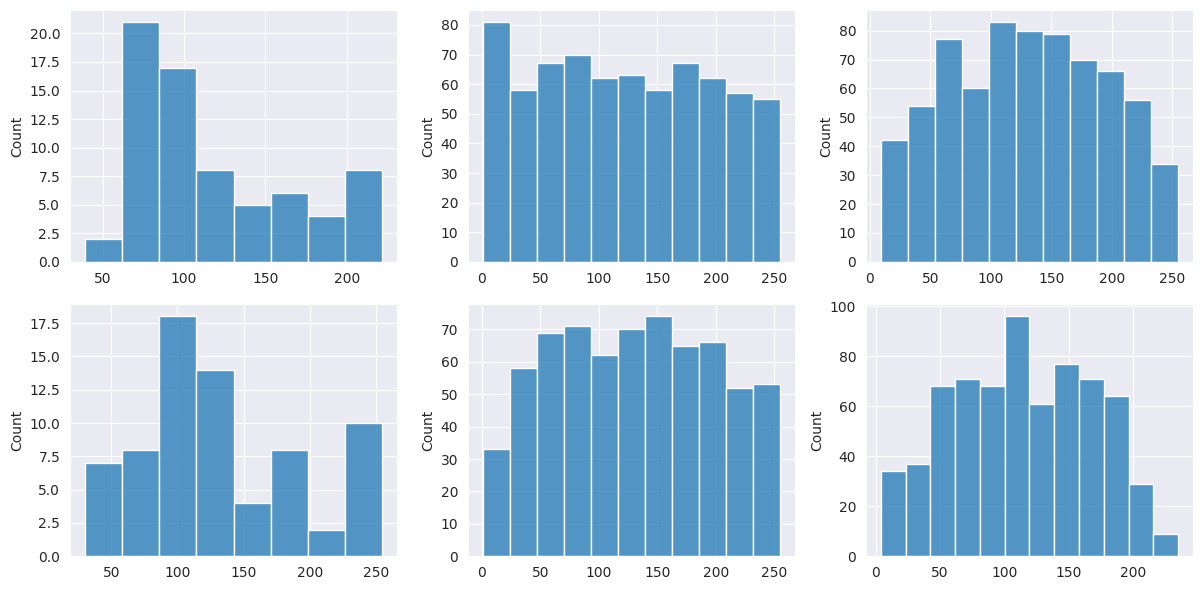

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

sns.histplot(imarr_1[:, :, 0][np.where(imarr_1[:, :, 0] != 0)].flatten(), ax=ax[0, 0])
sns.histplot(imarr_1[:, :, 1][np.where(imarr_1[:, :, 1] != 0)].flatten(), ax=ax[0, 1])
sns.histplot(imarr_1[:, :, 2][np.where(imarr_1[:, :, 2] != 0)].flatten(), ax=ax[0, 2])

sns.histplot(transformed_image[:, :, 0][np.where(transformed_image[:, :, 0] != 0)].flatten(), ax=ax[1, 0])
sns.histplot(transformed_image[:, :, 1][np.where(transformed_image[:, :, 1] != 0)].flatten(), ax=ax[1, 1])
sns.histplot(transformed_image[:, :, 2][np.where(transformed_image[:, :, 2] != 0)].flatten(), ax=ax[1, 2])
plt.tight_layout()
plt.show()